<a href="https://colab.research.google.com/github/robindong3/SD2I/blob/main/SD2I_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##SD2I on experimental dataset

This notebook contains the code for reconstructing experimental XRD-CT and micro-CT images. It can be used to reproduce Figure 6, 7, S6 and S7 in the paper 

Download the miniconda and astra-toolbox

In [1]:
%env PYTHONPATH=

env: PYTHONPATH=


In [2]:
!which python
!python --version

/usr/local/bin/python
Python 3.10.11


In [3]:
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-py310_23.3.1-0-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

PREFIX=/usr/local
Unpacking payload ...

Installing base environment...





Preparing transaction: ...working... done
Executing transaction: ...working... done
installation finished.


--2023-04-28 12:41:51--  https://repo.continuum.io/miniconda/Miniconda3-py310_23.3.1-0-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-py310_23.3.1-0-Linux-x86_64.sh [following]
--2023-04-28 12:41:51--  https://repo.anaconda.com/miniconda/Miniconda3-py310_23.3.1-0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73134376 (70M) [application/x-sh]
Saving to: ‘Miniconda3-py310_23.3.1-0-Linux-x86_64.sh’

     0K .......... .......... .......... .......... ..........  0% 16.9M 4s
    50K .......... .......... 

In [5]:
!conda --version
!which conda

import sys
_ = (sys.path
        .append("/usr/local/lib/python3.10/site-packages"))
sys.path

conda 23.3.1
/usr/local/bin/conda


['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/usr/local/lib/python3.10/site-packages']

In [6]:
!conda install -c astra-toolbox/label/dev -y astra-toolbox

Solving environment: | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - astra-toolbox


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    appdirs-1.4.4              |     pyhd3eb1b0_0          12 KB
    astra-toolbox-2.1.2        |  py310hb150abf_0         3.4 MB  astra-toolbox/label/dev
    blas-1.0                   |              mkl           6 KB
    cudatoolkit-11.3.1         |       h2bc3f7f_2       549.3 MB
    intel-openmp-2021.4.0      |    h06a4308_3561         4.2 MB
    libastra-2.1.2             |      cuda_11.3_0        11.1 MB  astra-toolbox/label/dev
    libgfortran-ng-11.2.0      |       h00389a5_1          20 KB
    libgfortran5-11.2.0        |       h1234567_1         2.0 MB
    mkl-2021.4.0               |     h06a4308_640       142.6 MB
    mkl-service-2.4.0          |  py310h7f8

In [7]:
! pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 37.3 MB/s eta 0:00:00


Install the SD2I packeage

In [8]:
! git clone https://github.com/robindong3/SD2I.git

Cloning into 'SD2I'...
remote: Enumerating objects: 104, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 104 (delta 36), reused 44 (delta 18), pack-reused 25
Receiving objects: 100% (104/104), 65.09 MiB | 20.23 MiB/s, done.
Resolving deltas: 100% (37/37), done.


In [9]:
! cd SD2I && pip install -e .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/SD2I
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 75.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 63.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 99.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 88.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.3/300.3 kB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 75.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 107.1 MB/s e

In [10]:
! pip show sd2i
! pip show tensorflow_addons

Name: sd2i
Version: 2023.4
Summary: Single Digit to Image reconstruction tool
Home-page: https://github.com/robindong3/sd2i
Author: H. Dong
Author-email: robondong3@gmail.com
License: LICENSE.txt
Location: /content/SD2I
Editable project location: /content/SD2I
Requires: cached_property, h5py, matplotlib, numpy, scikit-image, scikit-learn, tqdm, xdesign
Required-by: 
Name: tensorflow-addons
Version: 0.20.0
Summary: TensorFlow Addons.
Home-page: UNKNOWN
Author: Google Inc.
Author-email: opensource@google.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/site-packages
Requires: packaging, typeguard
Required-by: 


In [12]:
_ = (sys.path
        .append("/content/SD2I"))
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/usr/local/lib/python3.10/site-packages',
 '/content/SD2I']

Import all packages

In [13]:
from sd2i.shapes.phantoms import SheppLogan
from sd2i.utils.plots import showim, cirmask
from sd2i.utils.convtomo import fbpvol, sinocentering

from sd2i.models.models_tf import GANrec, SD2I, Automap, Discriminator

from sd2i.utils.utils_tf import ssim_mae_loss, discriminator_loss
from sd2i.utils.utils_tf import tf_gpu_devices, ReduceLROnPlateau_custom
from sd2i.utils.utils_tf import tf_create_angles, tf_tomo_transf, tf_tomo_radon, tf_tomo_squeeze, tf_tomo_bp, tf_mask_circle

import tqdm as tqdm
import numpy as np
import matplotlib.pyplot as plt
import time
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

import h5py
import tensorflow as tf

/usr/local/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Check if Tensorflow will run on GPU


In [14]:
tf_gpu_devices()

physical_devices = tf.config.list_physical_devices('GPU') 

print(physical_devices)

for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)

Default GPU Device:/device:GPU:0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Load the sinogram. We included all sinograms using in the paper.
Please choose from ['micro779_ch1', 'micro779_ch2', xrdct_ch1, xrdct_ch2, micro1559_ch1, micro1559_ch2]

In [17]:
#chose the dataset from ['micro779_ch1', 'micro779_ch2', xrdct_ch1, xrdct_ch2, micro1559_ch1, micro1559_ch2]
dataset_name = 'xrdct_ch1'

fn = 'SD2I/sd2i/dataset/sinograms_used_in_paper.h5'

with h5py.File(fn, 'r') as f:
    print(f.keys())
    sino = np.array(f[dataset_name + '_angsamp'][:])
    sino_full = np.array(f[dataset_name][:])

print('sinogram shape before angular undersampling: ', sino_full.shape)
print('sinogram shape after angular undersampling: ', sino.shape)

<KeysViewHDF5 ['micro1559_ch1', 'micro1559_ch1_angsamp', 'micro1559_ch2', 'micro1559_ch2_angsamp', 'micro779_ch1', 'micro779_ch1_angsamp', 'micro779_ch2', 'micro779_ch2_angsamp', 'xrdct_ch1', 'xrdct_ch1_angsamp', 'xrdct_ch2', 'xrdct_ch2_angsamp']>
sinogram shape before angular undersampling:  (400, 547)
sinogram shape after angular undersampling:  (100, 547)


Choosing reconstruction method.

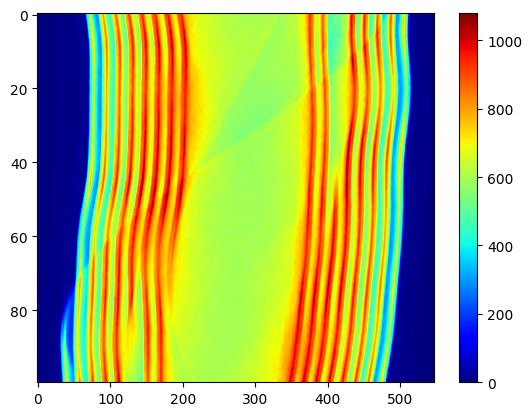

(1, 100, 547)


In [18]:
npix = sino.shape[1] # image size
npr = sino.shape[0] # number of projections

with_disc = False # Use discriminator or not

method = 'SD2Iup' # Choose method from 'SD2Iup', 'SD2I', 'GANrec', 'Automap'

factor = 16 # Used for SD2I methods

theta = np.radians(np.arange(0, 180, 180/sino_full.shape[0]))
theta = theta[::(sino_full.shape[0]//npr)]

pattern_input = sino.reshape([1, npr, npix, 1])
showim(tf_tomo_squeeze(pattern_input), 2)

pattern_input = pattern_input[:,:,:,0]
print(pattern_input.shape)

Let's create the mask

In [19]:
mask = np.ones((npix, npix))
mask = cirmask(mask,0)

Calculate the reconstructed image using the filtered back projection algorithm

In [20]:
def relufunc(x):
    return (abs(x) + x) / 2

The dimensions of the reconstructed volume are  (547, 547)


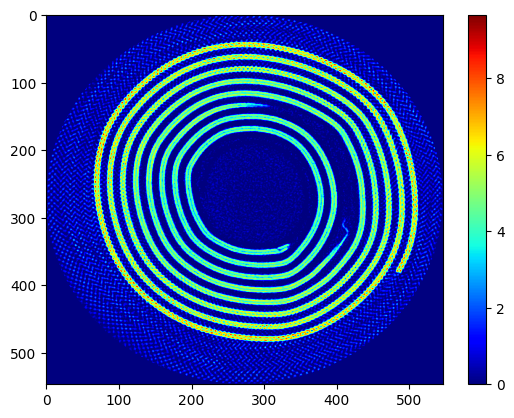

In [21]:
fbp = fbpvol(np.array(pattern_input[0]).transpose(), theta=np.rad2deg(theta), nt = npix)
fbp = relufunc(fbp)
showim(fbp, 3, clim=(0, np.max(fbp)))

Calculate the image without upsampling using the filtered back projection algorithm



The dimensions of the reconstructed volume are  (547, 547)


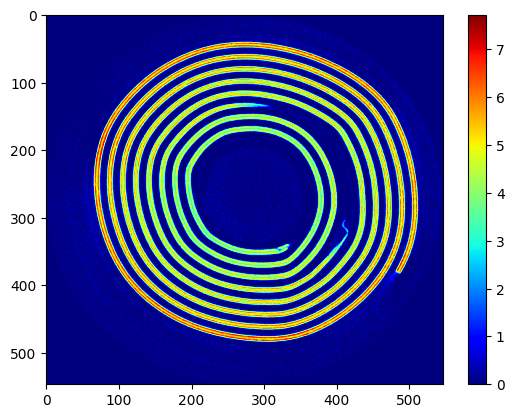

In [22]:
theta_full =  tf_create_angles(sino_full.shape[0])
fbp_full = fbpvol(np.array(sino_full).transpose(), theta=np.rad2deg(theta_full), nt = npix)
fbp_full = relufunc(fbp_full)
showim(fbp_full, 3, clim=(0, np.max(fbp_full)))

Next we prepare the function for training the neural network




Training loop

In [29]:
if not with_disc:
    @tf.function 
    def train_step(input_number, dataset, mask):
        print(1)
        with tf.GradientTape(persistent=True) as tape:

            generated_img = generator(input_number)
        
            print(generated_img.shape)
            generated_img = generated_img[0,:,:,0] * mask
            generated_img = tf.abs(generated_img)
            
            generated_img = tf.expand_dims(generated_img, 0, name=None)
            generated_img = tf.expand_dims(generated_img, 3, name=None)
            
            pattern_gen = tf_tomo_radon(generated_img, theta)
            pattern_gen = pattern_gen[:,:,:,0]
            pattern_gen = tf.transpose(pattern_gen, [1, 2, 0])
            

            dataset = tf.transpose(dataset, [1, 2, 0])
            print(3)
            print(pattern_gen.shape)
            print(dataset.shape)

            matrix_loss = ssim_mae_loss(dataset, pattern_gen)

        grad_gen = tape.gradient(matrix_loss, generator.trainable_variables)

        gen_optimizer.apply_gradients(zip(grad_gen, generator.trainable_variables))
        return matrix_loss

else:
    @tf.function 
    def train_step(input_number, dataset):
        print(1)
        with tf.GradientTape(persistent=True) as tape:

            generated_img = generator(input_number)
            print(generated_img.shape)
            generated_img = generated_img[0,:,:,0] * mask
            
            generated_img = tf.expand_dims(generated_img, 0, name=None)
            generated_img = tf.expand_dims(generated_img, 3, name=None)
            
            pattern_gen = tf_tomo_radon(generated_img, theta)
            
            real_output = discriminator(tf.expand_dims(dataset, -1))
            generated_output = discriminator(pattern_gen)
            
            pattern_gen = pattern_gen[0,:,:,0]
            
            pattern_gen = pattern_gen * mask
            
            pattern_gen = tf.expand_dims(pattern_gen, 2, name=None)
            dataset = tf.transpose(dataset, [1, 2, 0])
            print(2)
            print(dataset.shape)
            print(pattern_gen.shape)
            gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=generated_output,
                                      labels=tf.ones_like(generated_output))) \
                       + ssim_mae_loss(dataset, pattern_gen)

            disc_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=real_output, labels=tf.ones_like(real_output)))
            disc_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=generated_output, labels=tf.zeros_like(generated_output)))
            disc_loss = disc_loss_real+disc_loss_fake

        grad_disc = tape.gradient(disc_loss, discriminator.trainable_variables)
        grad_gen = tape.gradient(gen_loss, generator.trainable_variables)

        disc_optimizer.apply_gradients(zip(grad_disc, discriminator.trainable_variables))
        gen_optimizer.apply_gradients(zip(grad_gen, generator.trainable_variables))
        print(3)
        return gen_loss


Setup the model, optimizers and learning rate



In [30]:
if method == 'SD2Iup':
    generator = SD2I(npix, factor)
elif method == 'SD2I':
    generator = SD2I(npix, factor, upsample=False)
elif method == 'GANrec':
    generator = GANrec(npix, npr)
elif method == 'Automap':
    generator = Automap(npix, npr)
    
if with_disc:
    discriminator = Discriminator(npix, npr)
    disc_optimizer = tf.keras.optimizers.Adam(0.0005)
    
generator.summary()
gen_optimizer = tf.keras.optimizers.Adam(0.0005)

reduce_rl_plateau = ReduceLROnPlateau_custom(patience=int(300/100),
                            factor=0.5,
                            verbose=1, 
                            optim_lr=gen_optimizer.learning_rate, 
                            reduce_lin=True)


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 flatten_1 (Flatten)         (None, 1)                 0         
                                                                 
 dense_4 (Dense)             (None, 64)                128       
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 300304)            19519760  
                                                                 
 reshape_1 (Reshape)         (None, 137, 137, 16)      0   

In [34]:
max_point = np.max(sino)
def ssim_mae_loss(y_true, y_pred):
    return((1-0.87)*tf.reduce_mean(tf.keras.losses.MAE(y_pred, y_true)) + 0.87*(1 - tf.reduce_mean(tf.image.ssim(y_pred, y_true, max_point))))
def ssim_mae_loss(y_true, y_pred):
    return((1-0.87)*tf.reduce_mean(tf.keras.losses.MAE(y_pred, y_true)) + 0.87*(1 - tf.reduce_mean(tf.image.ssim(y_pred, y_true, 2.6))))


In [35]:
epochs = 6000
save_interval = 100

chemct_tf = tf.cast(pattern_input, 'float32')
mask = tf.cast(mask, 'float32')

if method == 'GANrec':
    bp = tf_tomo_bp(chemct_tf, theta)
    input_number = bp
elif method == 'Automap':
    input_number = chemct_tf
else:
    input_number = tf.cast(np.array([1]), 'float32')

start = time.time()
reduce_rl_plateau.on_train_begin()
kk = 1

for epoch in tqdm.tqdm_notebook(range(epochs)):

    loss = train_step(input_number, chemct_tf, mask)

    if epoch % save_interval == 0 and epoch != 0:

        print('Time for epoch {} to {} is {} sec/it - gen_loss = {}'.format(epoch - save_interval + 1, epoch, (time.time() - start) / save_interval, loss))
        start = time.time()
        plt.close()

        reduce_rl_plateau.on_epoch_end(kk, loss)
        kk += 1


<ipython-input-35-ca4709571a84>:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm.tqdm_notebook(range(epochs)):


  0%|          | 0/6000 [00:00<?, ?it/s]

Time for epoch 1 to 100 is 0.08414047956466675 sec/it - gen_loss = 1.4911621809005737
Time for epoch 101 to 200 is 0.08324748754501343 sec/it - gen_loss = 1.5362623929977417
Time for epoch 201 to 300 is 0.0838213324546814 sec/it - gen_loss = 1.4875524044036865
Time for epoch 301 to 400 is 0.08441495180130004 sec/it - gen_loss = 1.532326340675354
Time for epoch 401 to 500 is 0.08466170310974121 sec/it - gen_loss = 1.482211947441101
Time for epoch 501 to 600 is 0.08396666288375855 sec/it - gen_loss = 1.48027765750885
Time for epoch 601 to 700 is 0.08348024606704713 sec/it - gen_loss = 1.543289065361023
Time for epoch 701 to 800 is 0.08311455249786377 sec/it - gen_loss = 1.5627906322479248
Time for epoch 801 to 900 is 0.08293059587478638 sec/it - gen_loss = 1.51358962059021

Epoch 00010: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
Time for epoch 901 to 1000 is 0.0829896855354309 sec/it - gen_loss = 1.46869695186615
Time for epoch 1001 to 1100 is 0.08307115077972411 s

Finally we plot the reconstructed image and compare it the filter back projected

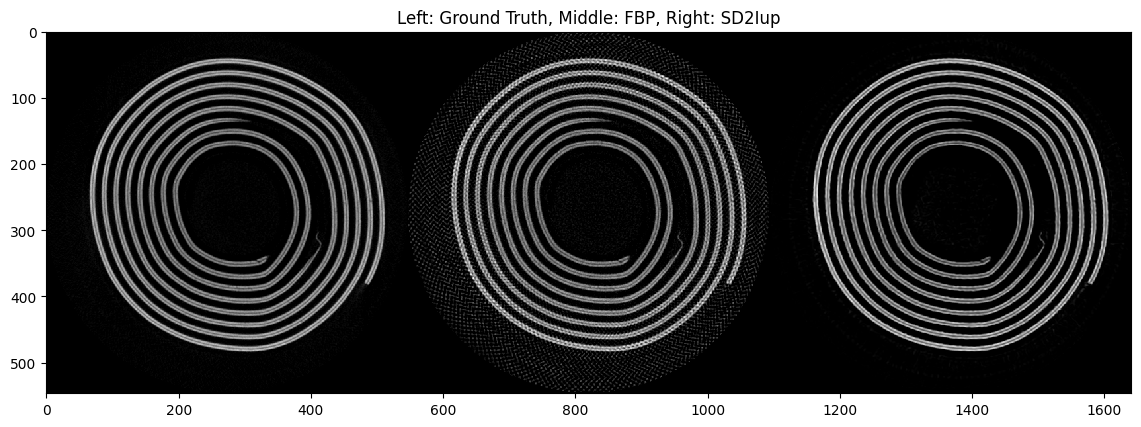

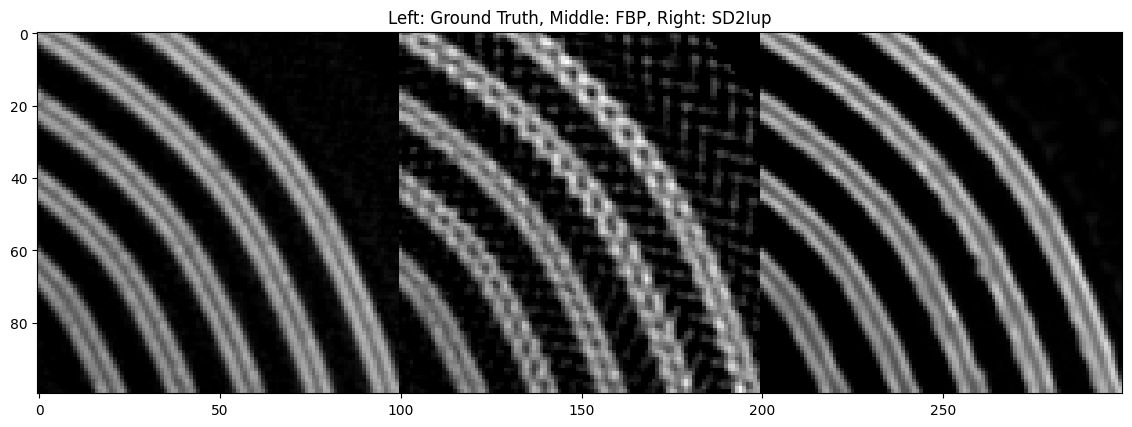

In [36]:
generated_img = generator(input_number)
generated_img = tf.abs(generated_img)
generated_img = np.array(generated_img)
generated_img = generated_img[0,:,:,0] * mask
generated_img = relufunc(generated_img)

plt.figure(1, figsize=(14,14));plt.clf()
plt.imshow(np.concatenate((fbp_full, fbp, generated_img[:,:]), axis=1), cmap='gray', interpolation = 'none')
# plt.clim(0, 1)
plt.title('Left: Ground Truth, Middle: FBP, Right: {}'.format(method))
plt.show()

plt.figure(1, figsize=(14,14));plt.clf()
plt.imshow(np.concatenate((fbp_full[100:200,400:500], fbp[100:200,400:500], generated_img[100:200,400:500]), axis=1), cmap='gray', interpolation = 'none')
# plt.clim(0, 1)
plt.title('Left: Ground Truth, Middle: FBP, Right: {}'.format(method))
plt.show()
